# Random Forest Surrogate Model

## import libs

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

import pandas as pd
import numpy as np
from scipy import stats
from matplotlib import pyplot as plt

import time

## read data

In [2]:
## grid sampling 1296
data1296 = pd.read_csv('CLEANED_gridsearch_1296.csv')
data1296 = data1296.drop(data1296.columns[0], axis=1)
X_1296 = data1296.drop('density', axis=1)
Y_1296 = data1296['density']
#print(f'{data1296}')
#print(f'{X_1296}')
#print(f'{Y_1296}')

## grid sampling 2401
data2401 = pd.read_csv('CLEANED_gridsearch_2401.csv')
data2401 = data2401.drop(data2401.columns[0], axis=1)
X_2401 = data2401.drop('density', axis=1)
Y_2401 = data2401['density']
#print(f'{data2401}')
#print(f'{X_2401}')
#print(f'{Y_2401}')

## sobol2 sampling
data_sobol1 = pd.read_csv('CLEANED_sobolsampling-2048.csv')
data_sobol1 = data_sobol1.drop(data_sobol1.columns[0], axis=1)
X_sobol1 = data_sobol1.drop('density', axis=1)
Y_sobol1 = data_sobol1['density']
#print(f'{data_sobol1}')
#print(f'{X_sobol1}')
#print(f'{Y_sobol1}')

## sobol2 sampling
data_sobol2 = pd.read_csv('CLEANED_sobolsampling-2048-2.csv')
data_sobol2 = data_sobol2.drop(data_sobol2.columns[0], axis=1)
X_sobol2 = data_sobol2.drop('density', axis=1)
Y_sobol2 = data_sobol2['density']
#print(f'{data_sobol2}')
#print(f'{X_sobol2}')
#print(f'{Y_sobol2}')

## prepare data

In [4]:
## suggestions for random ints
#random_array = np.random.rand(30)*100
#random_array = random_array.astype(int)
#print(f'{random_array}')

## actually used random ints hard coded
random_ints = [46, 40, 23, 29, 14, 78, 55, 33, 1, 61, 62, 39, 9, 25, 96, 95, 28, 27, 51, 0, 4, 39, 12, 41, 94, 70, 50, 18, 77, 37]
#print(f'{np.sort(random_ints)}')
trainingsizes = [0.05, 0.10, 0.15, 0.20, 0.25, 0.30, 0.35, 0.40, 0.45, 0.50, 0.55, 0.60, 0.65, 0.70, 0.75, 0.80, 0.85, 0.90, 0.95]

## split data based on random ints

In [5]:
## grid sampling 1296
X_TRAINs1296 = []
X_TESTs1296 = []
Y_TRAINs1296 = []
Y_TESTs1296 = []

## grid sampling 2401
X_TRAINs2401 = []
X_TESTs2401 = []
Y_TRAINs2401 = []
Y_TESTs2401 = []

## sobol sampling 1
X_TRAINsSobol1 = []
X_TESTsSobol1 = []
Y_TRAINsSobol1 = []
Y_TESTsSobol1 = []

## sobol sampling 2
X_TRAINsSobol2 = []
X_TESTsSobol2 = []
Y_TRAINsSobol2 = []
Y_TESTsSobol2 = []

for t in trainingsizes:
    testsize = np.round(1.0 - np.round(float(t), 2), 2)
    print(f'testsize = {testsize}')
    ## grid sampling 1296
    qX_TRAINs1296 = []
    qX_TESTs1296 = []
    qY_TRAINs1296 = []
    qY_TESTs1296 = []
    
    ## grid sampling 2401
    qX_TRAINs2401 = []
    qX_TESTs2401 = []
    qY_TRAINs2401 = []
    qY_TESTs2401 = []
    
    ## sobol sampling 1
    qX_TRAINsSobol1 = []
    qX_TESTsSobol1 = []
    qY_TRAINsSobol1 = []
    qY_TESTsSobol1 = []
    
    ## sobol sampling 2
    qX_TRAINsSobol2 = []
    qX_TESTsSobol2 = []
    qY_TRAINsSobol2 = []
    qY_TESTsSobol2 = []

    
    for i in random_ints:
        #print(f'{i}')
        ## use the X_test, Y_test data for testing combined with all the data of the other datasets
        X_train, X_test, Y_train, Y_test = train_test_split(X_1296, Y_1296, test_size=testsize, random_state=i)
        qX_TRAINs1296.append(X_train)
        qY_TRAINs1296.append(Y_train)
        #print(f'{X_test}')
        #print(f'{Y_test}')
        X_test = pd.concat([X_test, X_2401, X_sobol1, X_sobol2], ignore_index=True)
        Y_test = pd.concat([Y_test, Y_2401, Y_sobol1, Y_sobol2], ignore_index=True)
        qX_TESTs1296.append(X_test)
        qY_TESTs1296.append(Y_test)
        #print(f'{X_test}')
        #print(f'{Y_test}')
        
            
        X_train, X_test, Y_train, Y_test = train_test_split(X_2401, Y_2401, test_size=testsize, random_state=i)
        qX_TRAINs2401.append(X_train),
        qY_TRAINs2401.append(Y_train)
        X_test = pd.concat([X_test, X_1296, X_sobol1, X_sobol2], ignore_index=True)
        Y_test = pd.concat([Y_test, Y_1296, Y_sobol1, Y_sobol2], ignore_index=True)
        qX_TESTs2401.append(X_test)
        qY_TESTs2401.append(Y_test)
        
            
        X_train, X_test, Y_train, Y_test = train_test_split(X_sobol1, Y_sobol1, test_size=testsize, random_state=i)
        qX_TRAINsSobol1.append(X_train)
        qY_TRAINsSobol1.append(Y_train)
        X_test = pd.concat([X_test, X_1296, X_2401, X_sobol2], ignore_index=True)
        Y_test = pd.concat([Y_test, Y_1296, Y_2401, Y_sobol2], ignore_index=True)
        qX_TESTsSobol1.append(X_test)
        qY_TESTsSobol1.append(Y_test)
        
            
        X_train, X_test, Y_train, Y_test = train_test_split(X_sobol2, Y_sobol2, test_size=testsize, random_state=i)
        qX_TRAINsSobol2.append(X_train)
        qY_TRAINsSobol2.append(Y_train)
        X_test = pd.concat([X_test, X_1296, X_2401, X_sobol1], ignore_index=True)
        Y_test = pd.concat([Y_test, Y_1296, Y_2401, Y_sobol1], ignore_index=True)
        qX_TESTsSobol2.append(X_test)
        qY_TESTsSobol2.append(Y_test)

    ## grid sampling 1296
    X_TRAINs1296.append(qX_TRAINs1296)
    X_TESTs1296.append(qX_TESTs1296)
    Y_TRAINs1296.append(qY_TRAINs1296)
    Y_TESTs1296.append(qY_TESTs1296)
    
    ## grid sampling 2401
    X_TRAINs2401.append(qX_TRAINs2401)
    X_TESTs2401.append(qX_TESTs2401)
    Y_TRAINs2401.append(qY_TRAINs2401)
    Y_TESTs2401.append(qY_TESTs2401)
    
    ## sobol sampling 1
    X_TRAINsSobol1.append(qX_TRAINsSobol1)
    X_TESTsSobol1.append(qX_TESTsSobol1)
    Y_TRAINsSobol1.append(qY_TRAINsSobol1)
    Y_TESTsSobol1.append(qY_TESTsSobol1)
    
    ## sobol sampling 2
    X_TRAINsSobol2.append(qX_TRAINsSobol2)
    X_TESTsSobol2.append(qX_TESTsSobol2)
    Y_TRAINsSobol2.append(qY_TRAINsSobol2)
    Y_TESTsSobol2.append(qY_TESTsSobol2)

testsize = 0.95
testsize = 0.9
testsize = 0.85
testsize = 0.8
testsize = 0.75
testsize = 0.7
testsize = 0.65
testsize = 0.6
testsize = 0.55
testsize = 0.5
testsize = 0.45
testsize = 0.4
testsize = 0.35
testsize = 0.3
testsize = 0.25
testsize = 0.2
testsize = 0.15
testsize = 0.1
testsize = 0.05


## create and train models

In [7]:
## grid sampling 1296
MODELs1296 = []
Y_PREDICTIONs1296 = []
RMSEs1296 = []
R2s1296 = []
SPEARMANRs1296 = []

## grid sampling 2401
MODELs2401 = []
Y_PREDICTIONs2401 = []
RMSEs2401 = []
R2s2401 = []
SPEARMANRs2401 = []

## sobol sampling 1
MODELsSobol1 = []
Y_PREDICTIONsSobol1 = []
RMSEsSobol1 = []
R2sSobol1 = []
SPEARMANRsSobol1 = []

## sobol sampling 2
MODELsSobol2 = []
Y_PREDICTIONsSobol2 = []
RMSEsSobol2 = []
R2sSobol2 = []
SPEARMANRsSobol2 = []

for k in range(0, len(trainingsizes)):
    print(f'Training model with {trainingsizes[k]}% of the Data for training and {1-trainingsizes[k]}% for testing ...')
    ## grid sampling 1296
    qMODELs1296 = []
    qY_PREDICTIONs1296 = []
    qRMSEs1296 = []
    qR2s1296 = []
    qSPEARMANRs1296 = []
    
    ## grid sampling 2401
    qMODELs2401 = []
    qY_PREDICTIONs2401 = []
    qRMSEs2401 = []
    qR2s2401 = []
    qSPEARMANRs2401 = []
    
    ## sobol sampling 1
    qMODELsSobol1 = []
    qY_PREDICTIONsSobol1 = []
    qRMSEsSobol1 = []
    qR2sSobol1 = []
    qSPEARMANRsSobol1 = []
    
    ## sobol sampling 2
    qMODELsSobol2 = []
    qY_PREDICTIONsSobol2 = []
    qRMSEsSobol2 = []
    qR2sSobol2 = []
    qSPEARMANRsSobol2 = []
    
    for i in range(0, len(random_ints)):
        print(f'\t{i+1}/{len(random_ints)}')
        ## create the model
        model1296 = RandomForestRegressor(random_state=random_ints[i])
        #
        model2401 = RandomForestRegressor(random_state=random_ints[i])
        #
        modelSobol1 = RandomForestRegressor(random_state=random_ints[i])
        #
        modelSobol2 = RandomForestRegressor(random_state=random_ints[i])
        
        ## train/fit the model
        model1296.fit(X_TRAINs1296[k][i], Y_TRAINs1296[k][i])
        qMODELs1296.append(model1296)
        #
        model2401.fit(X_TRAINs2401[k][i], Y_TRAINs2401[k][i])
        qMODELs2401.append(model2401)
        #
        modelSobol1.fit(X_TRAINsSobol1[k][i], Y_TRAINsSobol1[k][i])
        qMODELsSobol1.append(modelSobol1)
        #
        modelSobol2.fit(X_TRAINsSobol2[k][i], Y_TRAINsSobol2[k][i])
        qMODELsSobol2.append(modelSobol2)
        
        ## prediction using the test set
        Y_prediction1296 = model1296.predict(X_TESTs1296[k][i])
        qY_PREDICTIONs1296.append(Y_prediction1296)
        #
        Y_prediction2401 = model2401.predict(X_TESTs2401[k][i])
        qY_PREDICTIONs2401.append(Y_prediction2401)
        #
        Y_predictionSobol1 = modelSobol1.predict(X_TESTsSobol1[k][i])
        qY_PREDICTIONsSobol1.append(Y_predictionSobol1)
        #
        Y_predictionSobol2 = modelSobol2.predict(X_TESTsSobol2[k][i])
        qY_PREDICTIONsSobol2.append(Y_predictionSobol2)
        
        ## evaluate with Y_test
        rmse1296 = np.sqrt(mean_squared_error(Y_TESTs1296[k][i], Y_prediction1296))
        r21296 = r2_score(Y_TESTs1296[k][i], Y_prediction1296)
        spearman_r1296 = stats.spearmanr(Y_TESTs1296[k][i], Y_prediction1296)
        qRMSEs1296.append(rmse1296)
        qR2s1296.append(r21296)
        qSPEARMANRs1296.append(spearman_r1296.statistic)
        #
        rmse2401 = np.sqrt(mean_squared_error(Y_TESTs2401[k][i], Y_prediction2401))
        r22401 = r2_score(Y_TESTs2401[k][i], Y_prediction2401)
        spearman_r2401 = stats.spearmanr(Y_TESTs2401[k][i], Y_prediction2401)
        qRMSEs2401.append(rmse2401)
        qR2s2401.append(r22401)
        qSPEARMANRs2401.append(spearman_r2401.statistic)
        #
        rmseSobol1 = np.sqrt(mean_squared_error(Y_TESTsSobol1[k][i], Y_predictionSobol1))
        r2Sobol1 = r2_score(Y_TESTsSobol1[k][i], Y_predictionSobol1)
        spearman_rSobol1 = stats.spearmanr(Y_TESTsSobol1[k][i], Y_predictionSobol1)
        qRMSEsSobol1.append(rmseSobol1)
        qR2sSobol1.append(r2Sobol1)
        qSPEARMANRsSobol1.append(spearman_rSobol1.statistic)
        #
        rmseSobol2 = np.sqrt(mean_squared_error(Y_TESTsSobol2[k][i], Y_predictionSobol2))
        r2Sobol2 = r2_score(Y_TESTsSobol2[k][i], Y_predictionSobol2)
        spearman_rSobol2 = stats.spearmanr(Y_TESTsSobol2[k][i], Y_predictionSobol2)
        qRMSEsSobol2.append(rmseSobol2)
        qR2sSobol2.append(r2Sobol2)
        qSPEARMANRsSobol2.append(spearman_rSobol2.statistic)

    ## grid sampling 1296
    MODELs1296.append(qMODELs1296)
    Y_PREDICTIONs1296.append(qY_PREDICTIONs1296)
    RMSEs1296.append(qRMSEs1296)
    R2s1296.append(qR2s1296)
    SPEARMANRs1296.append(qSPEARMANRs1296)
    
    ## grid sampling 2401
    MODELs2401.append(qMODELs2401)
    Y_PREDICTIONs2401.append(qY_PREDICTIONs2401)
    RMSEs2401.append(qRMSEs2401)
    R2s2401.append(qR2s2401)
    SPEARMANRs2401.append(qSPEARMANRs2401)
    
    ## sobol sampling 1
    MODELsSobol1.append(qMODELsSobol1)
    Y_PREDICTIONsSobol1.append(qY_PREDICTIONsSobol1)
    RMSEsSobol1.append(qRMSEsSobol1)
    R2sSobol1.append(qR2sSobol1)
    SPEARMANRsSobol1.append(qSPEARMANRsSobol1)
    
    ## sobol sampling 2
    MODELsSobol2.append(qMODELsSobol2)
    Y_PREDICTIONsSobol2.append(qY_PREDICTIONsSobol2)
    RMSEsSobol2.append(qRMSEsSobol2)
    R2sSobol2.append(qR2sSobol2)
    SPEARMANRsSobol2.append(qSPEARMANRsSobol2)

print(f'done.\n')

Training model with 0.05% of the Data for training and 0.95% for testing ...
	1/30
	2/30
	3/30
	4/30
	5/30
	6/30
	7/30
	8/30
	9/30
	10/30
	11/30
	12/30
	13/30
	14/30
	15/30
	16/30
	17/30
	18/30
	19/30
	20/30
	21/30
	22/30
	23/30
	24/30
	25/30
	26/30
	27/30
	28/30
	29/30
	30/30
Training model with 0.1% of the Data for training and 0.9% for testing ...
	1/30
	2/30
	3/30
	4/30
	5/30
	6/30
	7/30
	8/30
	9/30
	10/30
	11/30
	12/30
	13/30
	14/30
	15/30
	16/30
	17/30
	18/30
	19/30
	20/30
	21/30
	22/30
	23/30
	24/30
	25/30
	26/30
	27/30
	28/30
	29/30
	30/30
Training model with 0.15% of the Data for training and 0.85% for testing ...
	1/30
	2/30
	3/30
	4/30
	5/30
	6/30
	7/30
	8/30
	9/30
	10/30
	11/30
	12/30
	13/30
	14/30
	15/30
	16/30
	17/30
	18/30
	19/30
	20/30
	21/30
	22/30
	23/30
	24/30
	25/30
	26/30
	27/30
	28/30
	29/30
	30/30
Training model with 0.2% of the Data for training and 0.8% for testing ...
	1/30
	2/30
	3/30
	4/30
	5/30
	6/30
	7/30
	8/30
	9/30
	10/30
	11/30
	12/30
	13/30
	14/30
	15/

## calculate RMSE/R2/SpearmanRank

In [8]:
## grid sampling 1296
RMSEs1296_means = []
R2s1296_means = []
SPEARMANRs1296_means = []

## grid sampling 2401
RMSEs2401_means = []
R2s2401_means = []
SPEARMANRs2401_means = []

## sobol sampling 1
RMSEsSobol1_means = []
R2sSobol1_means = []
SPEARMANRsSobol1_means = []

## sobol sampling 2
RMSEsSobol2_means = []
R2sSobol2_means = []
SPEARMANRsSobol2_means = []
for k in range(0, len(trainingsizes)):
    ## grid sampling 1296
    rmse1296_mean = np.mean(RMSEs1296[k])
    RMSEs1296_means.append(rmse1296_mean)
    #
    r21296_mean = np.mean(R2s1296[k])
    R2s1296_means.append(r21296_mean)
    #
    spearmanr1296_mean = np.mean(SPEARMANRs1296[k])
    SPEARMANRs1296_means.append(spearmanr1296_mean)

    ## grid sampling 2401
    rmse2401_mean = np.mean(RMSEs2401[k])
    RMSEs2401_means.append(rmse2401_mean)
    #
    r22401_mean = np.mean(R2s2401[k])
    R2s2401_means.append(r22401_mean)
    #
    spearmanr2401_mean = np.mean(SPEARMANRs2401[k])
    SPEARMANRs2401_means.append(spearmanr2401_mean)

    ## Sobol 1
    rmseSobol1_mean = np.mean(RMSEsSobol1[k])
    RMSEsSobol1_means.append(rmseSobol1_mean)
    #
    r2Sobol1_mean = np.mean(R2sSobol1[k])
    R2sSobol1_means.append(r2Sobol1_mean)
    #
    spearmanrSobol1_mean = np.mean(SPEARMANRsSobol1[k])
    SPEARMANRsSobol1_means.append(spearmanrSobol1_mean)

    ## Sobol 2
    rmseSobol2_mean = np.mean(RMSEsSobol2[k])
    RMSEsSobol2_means.append(rmseSobol2_mean)
    #
    r2Sobol2_mean = np.mean(R2sSobol2[k])
    R2sSobol2_means.append(r2Sobol2_mean)
    #
    spearmanrSobol2_mean = np.mean(SPEARMANRsSobol2[k])
    SPEARMANRsSobol2_means.append(spearmanrSobol2_mean)

## plots

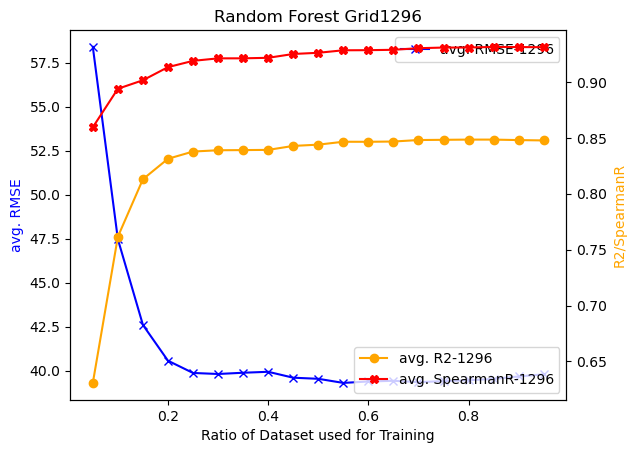

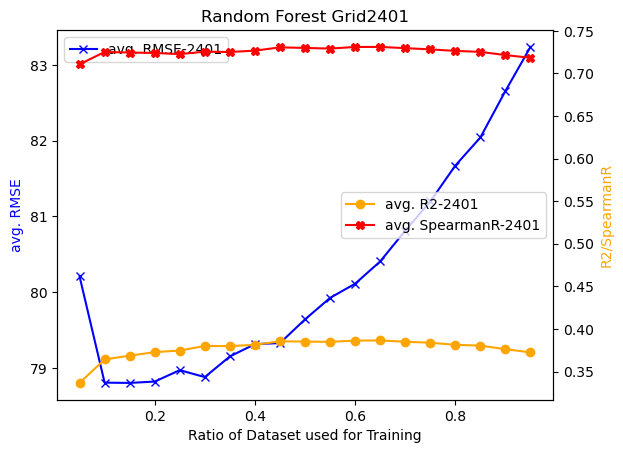

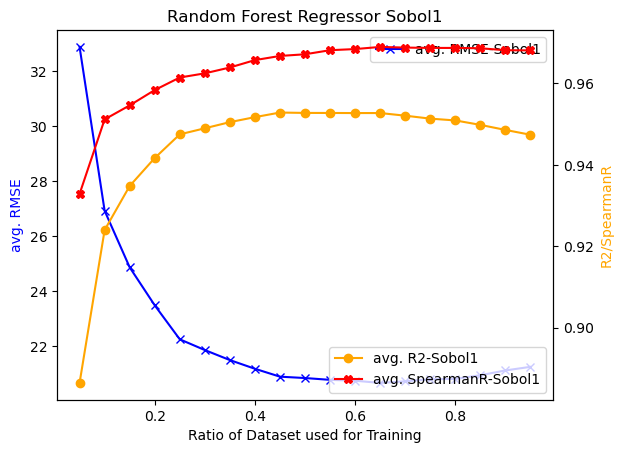

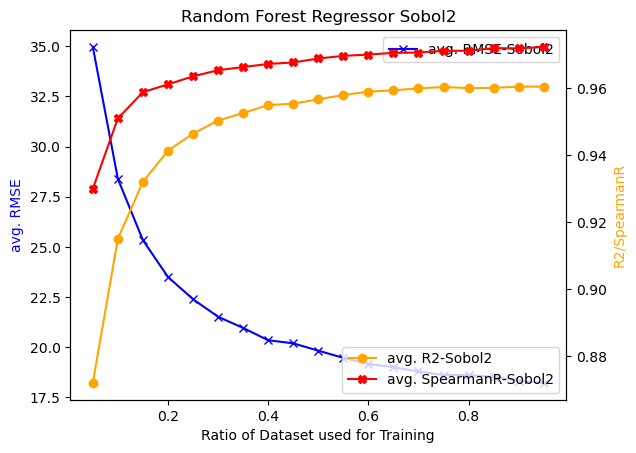

In [9]:
## Grid Sampling 1296
fig, ax1 = plt.subplots()
ax1.plot(trainingsizes, RMSEs1296_means, '-x', color='blue', label='avg. RMSE-1296')
ax1.set_xlabel('Ratio of Dataset used for Training')
ax1.set_ylabel('avg. RMSE', color='blue')
plt.legend()
plt.title('Random Forest Grid1296')

ax2 = ax1.twinx()
ax2.plot(trainingsizes, R2s1296_means, '-o', color='orange', label='avg. R2-1296')
ax2.plot(trainingsizes, SPEARMANRs1296_means, '-X', color='red', label='avg. SpearmanR-1296')
ax2.set_ylabel('R2/SpearmanR', color='orange')
plt.legend()

plt.show()
fig.savefig('RF_GRID1296_test-trainingsize.png')


## Grid Sampling 2401
fig, ax1 = plt.subplots()
ax1.plot(trainingsizes, RMSEs2401_means, '-x', color='blue', label='avg. RMSE-2401')
ax1.set_xlabel('Ratio of Dataset used for Training')
ax1.set_ylabel('avg. RMSE', color='blue')
plt.legend()
plt.title('Random Forest Grid2401')

ax2 = ax1.twinx()
ax2.plot(trainingsizes, R2s2401_means, '-o', color='orange', label='avg. R2-2401')
ax2.plot(trainingsizes, SPEARMANRs2401_means, '-X', color='red', label='avg. SpearmanR-2401')
ax2.set_ylabel('R2/SpearmanR', color='orange')
plt.legend()

plt.show()
fig.savefig('RF_GRID2401_test-trainingsize.png')


## Sobol 1
fig, ax1 = plt.subplots()
ax1.plot(trainingsizes, RMSEsSobol1_means, '-x', color='blue', label='avg. RMSE-Sobol1')
ax1.set_xlabel('Ratio of Dataset used for Training')
ax1.set_ylabel('avg. RMSE', color='blue')
plt.legend()
plt.title('Random Forest Regressor Sobol1')

ax2 = ax1.twinx()
ax2.plot(trainingsizes, R2sSobol1_means, '-o', color='orange', label='avg. R2-Sobol1')
ax2.plot(trainingsizes, SPEARMANRsSobol1_means, '-X', color='red', label='avg. SpearmanR-Sobol1')
ax2.set_ylabel('R2/SpearmanR', color='orange')
plt.legend()

plt.show()
fig.savefig('RF_Sobol-1_test-trainingsize.png')


## Sobol 2
fig, ax1 = plt.subplots()
ax1.plot(trainingsizes, RMSEsSobol2_means, '-x', color='blue', label='avg. RMSE-Sobol2')
ax1.set_xlabel('Ratio of Dataset used for Training')
ax1.set_ylabel('avg. RMSE', color='blue')
plt.legend()
plt.title('Random Forest Regressor Sobol2')

ax2 = ax1.twinx()
ax2.plot(trainingsizes, R2sSobol2_means, '-o', color='orange', label='avg. R2-Sobol2')
ax2.plot(trainingsizes, SPEARMANRsSobol2_means, '-X', color='red', label='avg. SpearmanR-Sobol2')
ax2.set_ylabel('R2/SpearmanR', color='orange')
plt.legend()

plt.show()
fig.savefig('RF_Sobol-2_test-trainingsize.png')

In [41]:
print(f'avg. RMSE: {np.mean(RMSEs)}')
print(f'Std Dev: {np.std(RMSEs)}')

avg. RMSE: 12.070934431112404
Std Dev: 2.631847729728539


In [42]:
print(f'avg. R2: {np.mean(R2s)}')
print(f'Std Dev: {np.std(R2s)}')

avg. R2: 0.9867401709739739
Std Dev: 0.006757256648615838


In [43]:
print(f'avg. R2: {np.mean(SPEARMANRs)}')
print(f'Std Dev: {np.std(SPEARMANRs)}')

avg. R2: 0.9873843862196041
Std Dev: 0.007696622258256076


## lowest RMSEs

In [10]:
min_RMSEs1296 = min(RMSEs1296_means)
print(f'min RMSEs1296 = \t\t\t\t{min_RMSEs1296}')
iRMSEs1296 = RMSEs1296_means.index(min_RMSEs1296)
print(f'Dataset ratio for trainingsdata = \t\t{trainingsizes[iRMSEs1296]}')
print(f'corresp. R2: R2s1296_means[{iRMSEs1296}] = \t\t{R2s1296_means[iRMSEs1296]}')
print(f'corresp. SpearmanR: SPEARMANRs1296_means[{iRMSEs1296}] = \t{SPEARMANRs1296_means[iRMSEs1296]}\n\n')

min_RMSEs2401 = min(RMSEs2401_means)
print(f'min RMSEs2401 = \t\t\t\t{min_RMSEs2401}')
iRMSEs2401 = RMSEs2401_means.index(min_RMSEs2401)
print(f'Dataset ratio for trainingsdata = \t\t{trainingsizes[iRMSEs2401]}')
print(f'corresp. R2: R2s2401_means[{iRMSEs2401}] = \t\t{R2s2401_means[iRMSEs2401]}')
print(f'corresp. SpearmanR: SPEARMANRs2401_means[{iRMSEs2401}] = \t{SPEARMANRs2401_means[iRMSEs2401]}\n\n')

min_RMSEsSobol1 = min(RMSEsSobol1_means)
print(f'min RMSEsSobol1 = \t\t\t\t{min_RMSEsSobol1}')
iRMSEsSobol1 = RMSEsSobol1_means.index(min_RMSEsSobol1)
print(f'Dataset ratio for trainingsdata = \t\t{trainingsizes[iRMSEsSobol1]}')
print(f'corresp. R2: R2sSobol1_means[{iRMSEsSobol1}] = \t\t{R2sSobol1_means[iRMSEsSobol1]}')
print(f'corresp. SpearmanR: SPEARMANRsSobol1_means[{iRMSEsSobol1}] = {SPEARMANRsSobol1_means[iRMSEsSobol1]}\n\n')

min_RMSEsSobol2 = min(RMSEsSobol2_means)
print(f'min RMSEsSobol2 = \t\t\t\t{min_RMSEsSobol2}')
iRMSEsSobol2 = RMSEsSobol2_means.index(min_RMSEsSobol2)
print(f'Dataset ratio for trainingsdata = \t\t{trainingsizes[iRMSEsSobol2]}')
print(f'corresp. R2: R2sSobol2_means[{iRMSEsSobol2}] = \t\t{R2sSobol2_means[iRMSEsSobol2]}')
print(f'corresp. SpearmanR: SPEARMANRsSobol2_means[{iRMSEsSobol2}] = {SPEARMANRsSobol2_means[iRMSEsSobol2]}\n\n')

min RMSEs1296 = 				39.294386053097305
Dataset ratio for trainingsdata = 		0.55
corresp. R2: R2s1296_means[10] = 		0.8465403487253932
corresp. SpearmanR: SPEARMANRs1296_means[10] = 	0.9283919029286769


min RMSEs2401 = 				78.80139133644174
Dataset ratio for trainingsdata = 		0.15
corresp. R2: R2s2401_means[2] = 		0.36866500785304146
corresp. SpearmanR: SPEARMANRs2401_means[2] = 	0.7245146215224149


min RMSEsSobol1 = 				20.662536838542568
Dataset ratio for trainingsdata = 		0.65
corresp. R2: R2sSobol1_means[12] = 		0.9527153559612977
corresp. SpearmanR: SPEARMANRsSobol1_means[12] = 0.9689565979182883


min RMSEsSobol2 = 				18.211299993821278
Dataset ratio for trainingsdata = 		0.95
corresp. R2: R2sSobol2_means[18] = 		0.9604483586559474
corresp. SpearmanR: SPEARMANRsSobol2_means[18] = 0.9723218374818142




## Check previously optimized parameters

In [11]:
min_RMSEs1296 = min(RMSEs1296_means)
iRMSEs1296 = RMSEs1296_means.index(min_RMSEs1296)
models1296 = MODELs1296[iRMSEs1296]

min_RMSEs2401 = min(RMSEs2401_means)
iRMSEs2401 = RMSEs2401_means.index(min_RMSEs2401)
models2401 = MODELs2401[iRMSEs2401]

min_RMSEsSobol1 = min(RMSEsSobol1_means)
iRMSEsSobol1 = RMSEsSobol1_means.index(min_RMSEsSobol1)
modelsSobol1 = MODELsSobol1[iRMSEsSobol1]

min_RMSEsSobol2 = min(RMSEsSobol2_means)
iRMSEsSobol2 = RMSEsSobol2_means.index(min_RMSEsSobol2)
modelsSobol2 = MODELsSobol2[iRMSEsSobol2]

x_opt = pd.DataFrame({'SigC': [0.3286], 'SigH': [0.2606], 'EpsC': [0.6730], 'EpsH': [0.1194]})
y_opt = pd.DataFrame({'density': [707.0]})

OPT_PREDICTION_1296 = []
OPT_PREDICTION_2401 = []
OPT_PREDICTION_SOBOL1 = []
OPT_PREDICTION_SOBOL2 = []

for i in range(0, len(models1296)):
    model1296 = models1296[i]
    model2401 = models2401[i]
    modelSobol1 = modelsSobol1[i]
    modelSobol2 = modelsSobol2[i]
    ## prediction using the test set
    OPT_PREDICTION_1296.append(model1296.predict(x_opt))
    #
    OPT_PREDICTION_2401.append(model2401.predict(x_opt))
    #
    OPT_PREDICTION_SOBOL1.append(modelSobol1.predict(x_opt))
    #
    OPT_PREDICTION_SOBOL2.append(modelSobol2.predict(x_opt))

## plot opt predictions

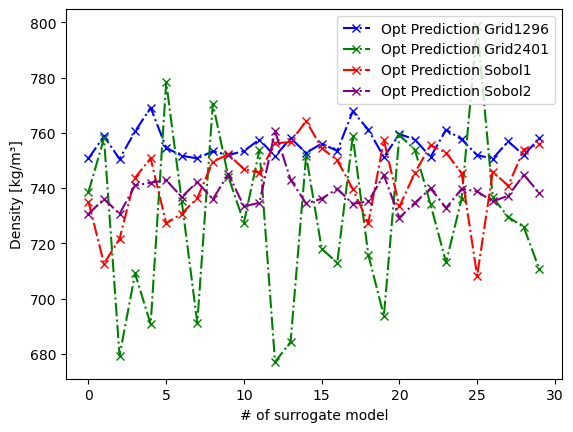

In [12]:
## Grid Sampling 1296
fig, ax1 = plt.subplots()
ax1.plot(OPT_PREDICTION_1296, '-.x', color='blue', label='Opt Prediction Grid1296')
ax1.plot(OPT_PREDICTION_2401, '-.x', color='green', label='Opt Prediction Grid2401')
ax1.plot(OPT_PREDICTION_SOBOL1, '-.x', color='red', label='Opt Prediction Sobol1')
ax1.plot(OPT_PREDICTION_SOBOL2, '-.x', color='purple', label='Opt Prediction Sobol2')
ax1.set_xlabel('# of surrogate model')
ax1.set_ylabel('Density [kg/m³]')
plt.legend()

plt.show()
fig.savefig('RF_prediction_of_optimized_parameterset.png')

In [15]:
ERR_1296 = []
ERR_2401 = []
ERR_SOBOL1 = []
ERR_SOBOL2 = []

for i in range(0, len(OPT_PREDICTION_1296)):
    ERR_1296.append(np.sqrt(np.power(707 - OPT_PREDICTION_1296[i],2)))
    ERR_2401.append(np.sqrt(np.power(707 - OPT_PREDICTION_2401[i],2)))
    ERR_SOBOL1.append(np.sqrt(np.power(707 - OPT_PREDICTION_SOBOL1[i],2)))
    ERR_SOBOL2.append(np.sqrt(np.power(707 - OPT_PREDICTION_SOBOL2[i],2)))

ibest_OPT_PREDICTION_1296 = ERR_1296.index(min(ERR_1296))
ibest_OPT_PREDICTION_2401 = ERR_2401.index(min(ERR_2401))
ibest_OPT_PREDICTION_SOBOL1 = ERR_SOBOL1.index(min(ERR_SOBOL1))
ibest_OPT_PREDICTION_SOBOL2 = ERR_SOBOL2.index(min(ERR_SOBOL2))

print(f'best opt_prediction_1296 = {OPT_PREDICTION_1296[ibest_OPT_PREDICTION_1296]}')
print(f'best opt_prediction_2401 = {OPT_PREDICTION_2401[ibest_OPT_PREDICTION_2401]}')
print(f'best opt_prediction_sobol1 = {OPT_PREDICTION_SOBOL1[ibest_OPT_PREDICTION_SOBOL1]}')
print(f'best opt_prediction_sobol2 = {OPT_PREDICTION_SOBOL2[ibest_OPT_PREDICTION_SOBOL2]}')

best opt_prediction_1296 = [750.53268]
best opt_prediction_2401 = [709.08659]
best opt_prediction_sobol1 = [708.28294]
best opt_prediction_sobol2 = [729.28752]
